install geopandas pacjake to read dor reading the shapefile

In [ ]:
!pip install geopandas

In [11]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [12]:
Belgium_map = gpd.GeoDataFrame.from_file('../data/arrondissements_shape/arrondissements_shape.shp') #it works ony if we upload the files to the session manually, but not if we indicate the path in the folder. 
#All four files (.dbf, .ptj, .shp, .shx) should be in the same folder, otherwise there are errors with reading the shapefile.

In [13]:
Belgium_map.head()

,Shape_Leng,Shape_Area,INS,LANG,Name1,Name2,geometry
0,169989.192808,1.003844e+09,11000,NN,Antwerpen,None,"POLYGON ((662106.376 740967.580, 662162.309 74..."
1,150947.175998,5.119499e+08,12000,NN,Mechelen,None,"POLYGON ((671311.591 707603.770, 671353.400 70..."
2,228401.102863,1.359241e+09,13000,NN,Turnhout,None,"MULTIPOLYGON (((688864.783 736887.001, 688888...."
3,62133.678433,1.625668e+08,21000,FN,Bruxelles,Brussel,"POLYGON ((653270.158 677320.255, 653291.392 67..."
4,281254.375729,9.488673e+08,23000,NN,Halle-Vilvoorde,None,"POLYGON ((643772.195 692449.425, 643815.652 69..."


Plot the shapefile

<AxesSubplot:>

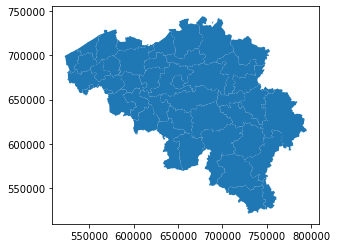

In [14]:
Belgium_map.plot()

Read the frequency file

In [15]:
heat_fr = pd.read_csv('../out/hw_freq_df.csv')
heat_fr.head()

,arron,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,41000,1,0,0,0,2,0,4,0,1,...,0,1,3,0,1,1,1,1,3,5
1,11000,1,0,0,0,2,0,4,0,1,...,0,1,3,0,1,1,1,1,3,5
2,81000,3,0,2,0,2,0,4,0,1,...,0,1,0,2,2,2,0,4,2,5
3,51000,1,0,0,0,2,0,4,0,1,...,0,1,0,1,1,1,0,2,2,5
4,45000,1,0,0,0,2,0,4,0,1,...,0,1,3,0,1,1,1,1,3,5


Keep only the necessary columns of a shapefile - geometry and code of arrondissement

In [16]:
Belgium_shapes = Belgium_map[['geometry', 'INS']]
Belgium_shapes.head()

,geometry,INS
0,"POLYGON ((662106.376 740967.580, 662162.309 74...",11000
1,"POLYGON ((671311.591 707603.770, 671353.400 70...",12000
2,"MULTIPOLYGON (((688864.783 736887.001, 688888....",13000
3,"POLYGON ((653270.158 677320.255, 653291.392 67...",21000
4,"POLYGON ((643772.195 692449.425, 643815.652 69...",23000


Add mean heat wave frequncies over decades to the file with frequencies

---



In [17]:
list_10years = ['1980-1989', '1990-1999', '2000-2009', '2010-2019']
for i in list_10years:
    start_str = i.split('-')[0]
    end_str = i.split('-')[1]
    heat_fr[i] = heat_fr.loc[: , start_str:end_str].mean(axis=1)
heat_fr.head(5)

,arron,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2015,2016,2017,2018,2019,2020,1980-1989,1990-1999,2000-2009,2010-2019
0,41000,1,0,0,0,2,0,4,0,1,...,1,1,1,1,3,5,0.8,1.5,1.5,1.4
1,11000,1,0,0,0,2,0,4,0,1,...,1,1,1,1,3,5,0.8,1.5,1.5,1.4
2,81000,3,0,2,0,2,0,4,0,1,...,2,2,0,4,2,5,1.2,1.6,1.6,2.0
3,51000,1,0,0,0,2,0,4,0,1,...,1,1,0,2,2,5,0.8,1.7,1.5,1.1
4,45000,1,0,0,0,2,0,4,0,1,...,1,1,1,1,3,5,0.8,1.5,1.5,1.4


Add frequencies for each 5 years to the same file

In [18]:
list_5years = ['1980-1984', '1985-1989', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2019']
for i in list_5years:
    start_str = i.split('-')[0]
    end_str = i.split('-')[1]
    heat_fr[i] = heat_fr.loc[: , start_str:end_str].mean(axis=1)
heat_fr.head(5)

,arron,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2000-2009,2010-2019,1980-1984,1985-1989,1990-1994,1995-1999,2000-2004,2005-2009,2010-2014,2015-2019
0,41000,1,0,0,0,2,0,4,0,1,...,1.5,1.4,0.6,1.0,0.6,2.4,2.0,1.0,1.4,1.4
1,11000,1,0,0,0,2,0,4,0,1,...,1.5,1.4,0.6,1.0,0.6,2.4,2.0,1.0,1.4,1.4
2,81000,3,0,2,0,2,0,4,0,1,...,1.6,2.0,1.4,1.0,1.2,2.0,2.2,1.0,2.0,2.0
3,51000,1,0,0,0,2,0,4,0,1,...,1.5,1.1,0.6,1.0,0.8,2.6,2.0,1.0,1.0,1.2
4,45000,1,0,0,0,2,0,4,0,1,...,1.5,1.4,0.6,1.0,0.6,2.4,2.0,1.0,1.4,1.4


Prepare the data for joining shapefile and heat frequency data. Rename the column in the shapefile

In [19]:
Belgium_shapes = Belgium_shapes.rename(columns ={'INS':'arron'})

In [20]:
Belgium_shapes.head() 

,geometry,arron
0,"POLYGON ((662106.376 740967.580, 662162.309 74...",11000
1,"POLYGON ((671311.591 707603.770, 671353.400 70...",12000
2,"MULTIPOLYGON (((688864.783 736887.001, 688888....",13000
3,"POLYGON ((653270.158 677320.255, 653291.392 67...",21000
4,"POLYGON ((643772.195 692449.425, 643815.652 69...",23000


Merge shapefile and heat wave frequency

In [21]:
Belgium_shapes_merge = Belgium_shapes.merge(heat_fr, on='arron', suffixes=('', '_drop'))
Belgium_shapes_merge.head()

,geometry,arron,1980,1981,1982,1983,1984,1985,1986,1987,...,2000-2009,2010-2019,1980-1984,1985-1989,1990-1994,1995-1999,2000-2004,2005-2009,2010-2014,2015-2019
0,"POLYGON ((662106.376 740967.580, 662162.309 74...",11000,1,0,0,0,2,0,4,0,...,1.5,1.4,0.6,1.0,0.6,2.4,2.0,1.0,1.4,1.4
1,"POLYGON ((671311.591 707603.770, 671353.400 70...",12000,1,0,0,0,2,0,4,0,...,1.5,1.4,0.6,1.0,0.6,2.4,2.0,1.0,1.4,1.4
2,"MULTIPOLYGON (((688864.783 736887.001, 688888....",13000,3,0,2,0,2,0,4,0,...,1.4,1.4,1.4,1.0,0.8,2.2,1.8,1.0,1.2,1.6
3,"POLYGON ((653270.158 677320.255, 653291.392 67...",21000,1,0,0,0,2,0,4,0,...,1.5,1.4,0.6,1.0,0.6,2.4,2.0,1.0,1.4,1.4
4,"POLYGON ((643772.195 692449.425, 643815.652 69...",23000,1,0,0,0,2,0,4,0,...,1.5,1.4,0.6,1.0,0.6,2.4,2.0,1.0,1.4,1.4


Plot the heat frequency for one year

<AxesSubplot:>

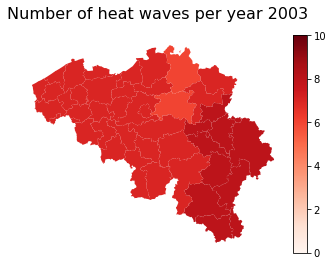

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)
ax.set_axis_off()
fig.suptitle('Number of heat waves per year 2003', fontsize=16)
cax = divider.append_axes("right", size="5%", pad=0.1)
vmin, vmax = 0, 10
Belgium_shapes_merge.plot(column='2003', cmap='Reds', ax=ax, legend=True, cax=cax, vmin=vmin, vmax=vmax)

Plot the average heatwave frequencies per decade

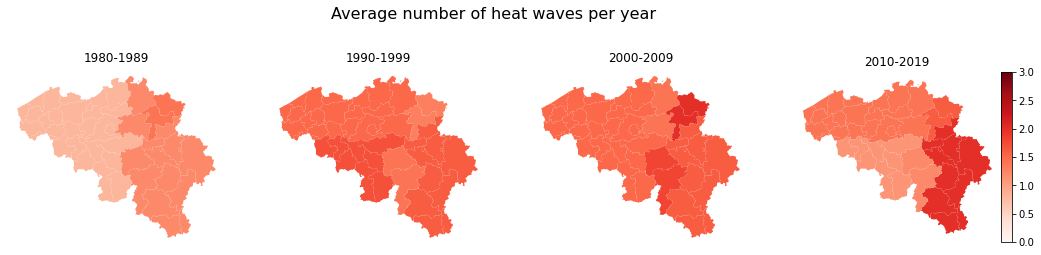

In [23]:
fig, (ax1,ax2,ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))
divider = make_axes_locatable(ax4)
fig.suptitle('Average number of heat waves per year', fontsize=16, y=0.85)

cax = divider.append_axes("right", size="5%", pad=0)
vmin, vmax = 0, 3
axees = list((ax1,ax2,ax3,ax4))
for i, x in enumerate(axees):
    x.set_axis_off()
    x = Belgium_shapes_merge.plot(ax=x, column=list_10years[i], cmap='Reds', legend=True, cax=cax, vmin=vmin, vmax=vmax)
    x.set_title(list_10years[i])

Plot average heat wave frequencies at 5 year interval

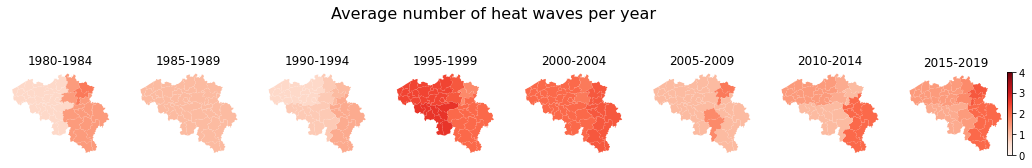

In [24]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(nrows=1, ncols=8, figsize=(18, 6))
divider = make_axes_locatable(ax8)
fig.suptitle('Average number of heat waves per year', fontsize=16, y=0.75)

cax = divider.append_axes("right", size="5%", pad=0)
vmin, vmax = 0, 4 # Mario - HERE use max(from last 8 columns instead of 4)

axees = list((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8))
for i, x in enumerate(axees):
    x.set_axis_off()
    x = Belgium_shapes_merge.plot(ax=x, column=list_5years[i], cmap='Reds', legend=True, cax=cax, vmin=vmin, vmax=vmax)
    x.set_title(list_5years[i])

Explore trends in heat intensities
(average T above the local threshols during heat waves (°C)) 

In [25]:
heat_intens = pd.read_csv('../out/hw_int_df.csv')
heat_intens.head()

,arron,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,41000,3.875000,0,0.00,0,1.350,0,2.25,0,2.4,...,0,2.825,5.126667,0.00,0.64,2.100,0.6,1.320,1.40,4.010
1,11000,3.875000,0,0.00,0,1.350,0,2.25,0,2.4,...,0,2.825,5.126667,0.00,0.64,2.100,0.6,1.320,1.40,4.010
2,81000,0.841667,0,1.15,0,1.025,0,1.72,0,2.0,...,0,2.400,0.000000,0.30,4.55,2.400,0.0,1.195,1.17,3.845
3,51000,3.875000,0,0.00,0,1.350,0,2.25,0,2.4,...,0,3.050,0.000000,0.84,1.24,2.925,0.0,0.470,1.80,4.285
4,45000,3.875000,0,0.00,0,1.350,0,2.25,0,2.4,...,0,2.825,5.126667,0.00,0.64,2.100,0.6,1.320,1.40,4.010


Calculate mean intensity for 5 year intervals

In [26]:
for i in list_5years:
    start_str = i.split('-')[0]
    end_str = i.split('-')[1]
    heat_intens[i] = heat_intens.loc[: , start_str:end_str].mean(axis=1) 
heat_intens.head(5)

,arron,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2019,2020,1980-1984,1985-1989,1990-1994,1995-1999,2000-2004,2005-2009,2010-2014,2015-2019
0,41000,3.875000,0,0.00,0,1.350,0,2.25,0,2.4,...,1.40,4.010,1.045000,0.930,0.476,1.293000,1.072857,0.889,1.962333,1.212
1,11000,3.875000,0,0.00,0,1.350,0,2.25,0,2.4,...,1.40,4.010,1.045000,0.930,0.476,1.293000,1.072857,0.889,1.962333,1.212
2,81000,0.841667,0,1.15,0,1.025,0,1.72,0,2.0,...,1.17,3.845,0.603333,0.744,0.560,1.205000,1.264000,0.720,1.185714,1.863
3,51000,3.875000,0,0.00,0,1.350,0,2.25,0,2.4,...,1.80,4.285,1.045000,0.930,0.642,1.397333,1.325143,0.838,1.136667,1.287
4,45000,3.875000,0,0.00,0,1.350,0,2.25,0,2.4,...,1.40,4.010,1.045000,0.930,0.476,1.293000,1.072857,0.889,1.962333,1.212


Add average intensity per decade

In [27]:
for i in list_10years:
    start_str = i.split('-')[0]
    end_str = i.split('-')[1]
    heat_intens[i] = heat_intens.loc[: , start_str:end_str].mean(axis=1)
heat_intens.head(5)

,arron,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1990-1994,1995-1999,2000-2004,2005-2009,2010-2014,2015-2019,1980-1989,1990-1999,2000-2009,2010-2019
0,41000,3.875000,0,0.00,0,1.350,0,2.25,0,2.4,...,0.476,1.293000,1.072857,0.889,1.962333,1.212,0.987500,0.884500,0.980929,1.587167
1,11000,3.875000,0,0.00,0,1.350,0,2.25,0,2.4,...,0.476,1.293000,1.072857,0.889,1.962333,1.212,0.987500,0.884500,0.980929,1.587167
2,81000,0.841667,0,1.15,0,1.025,0,1.72,0,2.0,...,0.560,1.205000,1.264000,0.720,1.185714,1.863,0.673667,0.882500,0.992000,1.524357
3,51000,3.875000,0,0.00,0,1.350,0,2.25,0,2.4,...,0.642,1.397333,1.325143,0.838,1.136667,1.287,0.987500,1.019667,1.081571,1.211833
4,45000,3.875000,0,0.00,0,1.350,0,2.25,0,2.4,...,0.476,1.293000,1.072857,0.889,1.962333,1.212,0.987500,0.884500,0.980929,1.587167


Merge shapefile and intensity data

In [28]:
Belgium_shapes_intens = Belgium_shapes.merge(heat_intens, on='arron', suffixes=('', '_drop'))
Belgium_shapes_intens.head()

,geometry,arron,1980,1981,1982,1983,1984,1985,1986,1987,...,1990-1994,1995-1999,2000-2004,2005-2009,2010-2014,2015-2019,1980-1989,1990-1999,2000-2009,2010-2019
0,"POLYGON ((662106.376 740967.580, 662162.309 74...",11000,3.875,0,0.00,0,1.35,0,2.250,0,...,0.476,1.293,1.072857,0.889000,1.962333,1.212,0.9875,0.8845,0.980929,1.587167
1,"POLYGON ((671311.591 707603.770, 671353.400 70...",12000,3.875,0,0.00,0,1.35,0,2.250,0,...,0.476,1.293,1.072857,0.889000,1.962333,1.212,0.9875,0.8845,0.980929,1.587167
2,"MULTIPOLYGON (((688864.783 736887.001, 688888....",13000,2.675,0,0.65,0,1.55,0,2.245,0,...,0.644,1.322,1.199333,1.022333,0.805000,1.912,0.9245,0.9830,1.110833,1.358500
3,"POLYGON ((653270.158 677320.255, 653291.392 67...",21000,3.875,0,0.00,0,1.35,0,2.250,0,...,0.476,1.293,1.072857,0.889000,1.962333,1.212,0.9875,0.8845,0.980929,1.587167
4,"POLYGON ((643772.195 692449.425, 643815.652 69...",23000,3.875,0,0.00,0,1.35,0,2.250,0,...,0.476,1.293,1.072857,0.889000,1.962333,1.212,0.9875,0.8845,0.980929,1.587167


Plot the heat intensity per decade

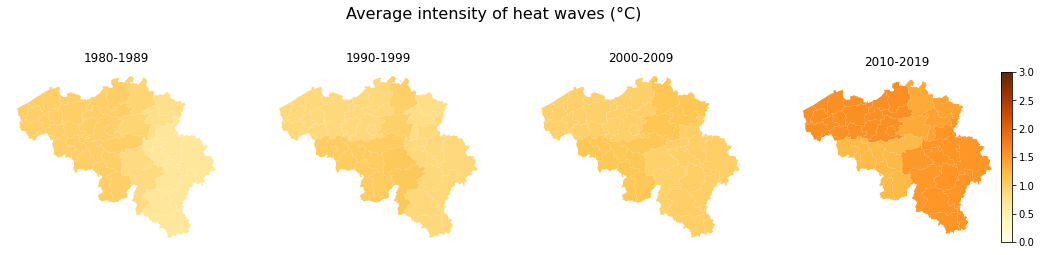

In [29]:
fig, (ax1,ax2,ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))
divider = make_axes_locatable(ax4)
fig.suptitle('Average intensity of heat waves (°C)', fontsize=16, y=0.85)

cax = divider.append_axes("right", size="5%", pad=0)
vmin, vmax = 0, 3
axees = list((ax1,ax2,ax3,ax4))
for i, x in enumerate(axees):
    x.set_axis_off()
    x = Belgium_shapes_intens.plot(ax=x, column=list_10years[i], cmap='YlOrBr', legend=True, cax=cax, vmin=vmin, vmax=vmax)
    x.set_title(list_10years[i])

Plot the heat intensity (average T above the local threshols during heat waves (°C)) per 5 year period

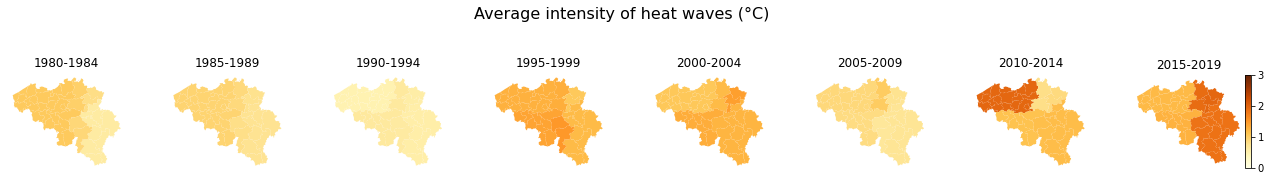

In [30]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(nrows=1, ncols=8, figsize=(18, 6))
divider = make_axes_locatable(ax8)
fig.suptitle('Average intensity of heat waves (°C)', fontsize=16, y=0.75)
fig.tight_layout()

cax = divider.append_axes("right", size="5%", pad=0)
vmin, vmax = 0, 3
axees = list((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8))
for i, x in enumerate(axees):
    x.set_axis_off()
    x = Belgium_shapes_intens.plot(ax=x, column=list_5years[i], cmap='YlOrBr', legend=True, cax=cax, vmin=vmin, vmax=vmax)
    x.set_title(list_5years[i])

Brussels (potential heat island, NIS code 21000) and Halle-Vilvoorde (surrounding area, NIS code 23000) have the same data for some reason. So Brussels and Leuven (next closest arrondisement. NIS code 24000) are taken for checking is there a heat island effect.

In [31]:
heat_fr

,arron,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2000-2009,2010-2019,1980-1984,1985-1989,1990-1994,1995-1999,2000-2004,2005-2009,2010-2014,2015-2019
0,41000,1,0,0,0,2,0,4,0,1,...,1.5,1.4,0.6,1.0,0.6,2.4,2.0,1.0,1.4,1.4
1,11000,1,0,0,0,2,0,4,0,1,...,1.5,1.4,0.6,1.0,0.6,2.4,2.0,1.0,1.4,1.4
2,81000,3,0,2,0,2,0,4,0,1,...,1.6,2.0,1.4,1.0,1.2,2.0,2.2,1.0,2.0,2.0
3,51000,1,0,0,0,2,0,4,0,1,...,1.5,1.1,0.6,1.0,0.8,2.6,2.0,1.0,1.0,1.2
4,45000,1,0,0,0,2,0,4,0,1,...,1.5,1.4,0.6,1.0,0.6,2.4,2.0,1.0,1.4,1.4
5,82000,3,0,2,0,2,0,4,0,1,...,1.6,2.0,1.4,1.0,1.2,2.0,2.2,1.0,2.0,2.0
6,31000,1,0,0,0,2,0,4,0,1,...,1.5,1.4,0.6,1.0,0.6,2.4,2.0,1.0,1.4,1.4
7,21000,1,0,0,0,2,0,4,0,1,...,1.5,1.4,0.6,1.0,0.6,2.4,2.0,1.0,1.4,1.4
8,52000,1,0,0,0,2,0,4,0,1,...,1.5,1.1,0.6,1.0,0.8,2.6,2.0,1.0,1.0,1.2
9,34000,1,0,0,0,2,0,4,0,1,...,1.5,1.4,0.6,1.0,0.6,2.4,2.0,1.0,1.4,1.4


Create a dataframe for heat wave frequency plot

In [32]:
Brussels=heat_fr.loc[7].values.tolist()
del Brussels[0]
del Brussels[41:54]
print(Brussels)
Leuven=heat_fr.loc[19].values.tolist()
del Leuven[0]
del Leuven[41:54]
print(Leuven)

[1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 4.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 4.0, 5.0, 2.0, 0.0, 1.0, 2.0, 7.0, 0.0, 0.0, 4.0, 0.0, 1.0, 0.0, 3.0, 0.0, 1.0, 3.0, 0.0, 1.0, 1.0, 1.0, 1.0, 3.0, 5.0]
[3.0, 0.0, 2.0, 0.0, 2.0, 0.0, 4.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 4.0, 5.0, 1.0, 0.0, 1.0, 2.0, 6.0, 0.0, 0.0, 3.0, 0.0, 1.0, 1.0, 5.0, 0.0, 1.0, 0.0, 0.0, 2.0, 1.0, 1.0, 2.0, 2.0, 5.0]


In [33]:
years=list(heat_fr.columns.values)
del years[42:54]
del years[0]
print(years)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


In [34]:
hw_freq_Bru = pd.DataFrame()
hw_freq_Bru['Leuven'] = Leuven
hw_freq_Bru['Brussels'] = Brussels
hw_freq_Bru.index=years
hw_freq_Bru.head()

,Leuven,Brussels
1980,3.0,1.0
1981,0.0,0.0
1982,2.0,0.0
1983,0.0,0.0
1984,2.0,2.0


Plot the heat frequncies in Brussels and surroundings

<AxesSubplot:title={'center':'Heat waves frequency in Brussels (NIS code 21000) and Leuven (NIS code 24000)'}, ylabel='Number of heat waves per year'>

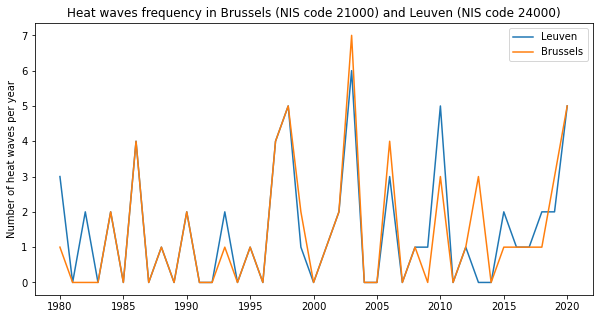

In [35]:
fig, ax = plt.subplots(1, 1)
ax.set(title = "Heat waves frequency in Brussels (NIS code 21000) and Leuven (NIS code 24000)", 
       ylabel = "Number of heat waves per year")
hw_freq_Bru.plot(ax=ax, figsize=(10,5), legend= "True")

In [36]:
heat_intens

,arron,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1990-1994,1995-1999,2000-2004,2005-2009,2010-2014,2015-2019,1980-1989,1990-1999,2000-2009,2010-2019
0,41000,3.875000,0,0.000000,0,1.350,0,2.250,0,2.400,...,0.476,1.293000,1.072857,0.889000,1.962333,1.212,0.987500,0.884500,0.980929,1.587167
1,11000,3.875000,0,0.000000,0,1.350,0,2.250,0,2.400,...,0.476,1.293000,1.072857,0.889000,1.962333,1.212,0.987500,0.884500,0.980929,1.587167
2,81000,0.841667,0,1.150000,0,1.025,0,1.720,0,2.000,...,0.560,1.205000,1.264000,0.720000,1.185714,1.863,0.673667,0.882500,0.992000,1.524357
3,51000,3.875000,0,0.000000,0,1.350,0,2.250,0,2.400,...,0.642,1.397333,1.325143,0.838000,1.136667,1.287,0.987500,1.019667,1.081571,1.211833
4,45000,3.875000,0,0.000000,0,1.350,0,2.250,0,2.400,...,0.476,1.293000,1.072857,0.889000,1.962333,1.212,0.987500,0.884500,0.980929,1.587167
5,82000,0.841667,0,1.150000,0,1.025,0,1.720,0,2.000,...,0.560,1.205000,1.264000,0.720000,1.185714,1.863,0.673667,0.882500,0.992000,1.524357
6,31000,3.875000,0,0.000000,0,1.350,0,2.250,0,2.400,...,0.476,1.293000,1.072857,0.889000,1.962333,1.212,0.987500,0.884500,0.980929,1.587167
7,21000,3.875000,0,0.000000,0,1.350,0,2.250,0,2.400,...,0.476,1.293000,1.072857,0.889000,1.962333,1.212,0.987500,0.884500,0.980929,1.587167
8,52000,3.875000,0,0.000000,0,1.350,0,2.250,0,2.400,...,0.642,1.397333,1.325143,0.838000,1.136667,1.287,0.987500,1.019667,1.081571,1.211833
9,34000,3.875000,0,0.000000,0,1.350,0,2.250,0,2.400,...,0.476,1.293000,1.072857,0.889000,1.962333,1.212,0.987500,0.884500,0.980929,1.587167


Create a dataframe for heat intensity plot

In [37]:
Brussels_int=heat_intens.loc[7].values.tolist()
del Brussels_int[0]
del Brussels_int[41:54]
print(Brussels_int)
Leuven_int=heat_intens.loc[19].values.tolist()
del Leuven_int[0]
del Leuven_int[41:54]
print(Leuven_int)

[3.875, 0.0, 0.0, 0.0, 1.3499999999999996, 0.0, 2.2499999999999982, 0.0, 2.400000000000002, 0.0, 2.1599999999999966, 0.0, 0.0, 0.2200000000000024, 0.0, 1.0199999999999996, 0.0, 1.7950000000000008, 2.660000000000001, 0.990000000000002, 0.0, 0.899999999999995, 2.1499999999999986, 2.3142857142857154, 0.0, 0.0, 2.1950000000000003, 0.0, 2.25, 0.0, 1.8599999999999932, 0.0, 2.8249999999999997, 5.126666666666663, 0.0, 0.6400000000000006, 2.1000000000000014, 0.6000000000000014, 1.3200000000000005, 1.3999999999999997, 4.01]
[2.6750000000000007, 0.0, 0.6500000000000021, 0.0, 1.5500000000000007, 0.0, 2.2449999999999983, 0.0, 2.125, 0.0, 2.159999999999993, 0.0, 0.0, 1.0599999999999952, 0.0, 0.9399999999999976, 0.0, 1.749999999999995, 2.4800000000000004, 1.4399999999999975, 0.0, 1.0599999999999952, 2.1700000000000017, 2.7666666666666644, 0.0, 0.0, 1.686666666666665, 0.0, 2.224999999999998, 1.2000000000000028, 0.9999999999999936, 0.0, 3.0249999999999986, 0.0, 0.0, 4.409999999999993, 2.099999999999998

In [38]:
hw_int_Bru = pd.DataFrame()
hw_int_Bru['Leuven'] = Leuven_int
hw_int_Bru['Brussels'] = Brussels_int
hw_int_Bru.index=years
hw_int_Bru.head()

,Leuven,Brussels
1980,2.675,3.875
1981,0.000,0.000
1982,0.650,0.000
1983,0.000,0.000
1984,1.550,1.350


Plot the heat wave intensities in Brussels and surroundings

<AxesSubplot:title={'center':'Heat waves intensity in Brussels (NIS code 21000) and Leuven (NIS code 24000)'}, ylabel='Intensity of heat waves (°C)'>

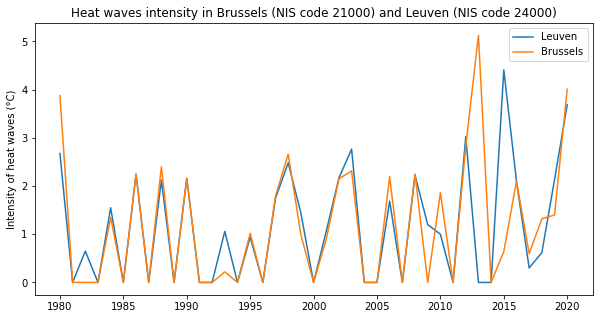

In [39]:
fig, ax = plt.subplots(1, 1)
ax.set(title = "Heat waves intensity in Brussels (NIS code 21000) and Leuven (NIS code 24000)", 
       ylabel = "Intensity of heat waves (°C)")
hw_int_Bru.plot(ax=ax, figsize=(10,5), legend= "True")